In [1]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=2

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=2


In [2]:
import tensorflow as tf
from datetime import datetime
from tqdm.autonotebook import tqdm
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
from avgn.networks.vae import VAE, test_network
from avgn.networks.test_datasets import load_fashion_MNIST
from avgn.networks.sample_networks import fc_net, conv_net

In [4]:
def generate_images(model, elbo, epoch, test_input):
    display.clear_output(wait=False)
    print(
        "Epoch: {}, Test set ELBO: {}".format(
            epoch, elbo
        )
    )
    predictions = model.sample(test_input)
    fig = plt.figure(figsize=(8, 8))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(predictions[i, :, :, 0], cmap="gray")
        plt.axis("off")

    # tight_layout minimizes the overlap between 2 sub-plots
    plt.show()


In [5]:
epochs = 100
latent_dim = 2
dims = (28 , 28, 1)

In [6]:
num_examples_to_generate = 16

random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, latent_dim]
)

In [8]:
network_arch = conv_net(dims=dims, n_Z = latent_dim)

In [10]:
# prepare the optimizer
optimizer = tf.keras.optimizers.Adam(1e-4)
# train the model
model = VAE(
    enc = network_arch.encoder,
    dec = network_arch.decoder,
    dims = dims, 
    optimizer = optimizer
)

In [11]:
# get the datasets
train_dataset, test_dataset = load_fashion_MNIST()

In [ ]:
np.shape(next(iter(train_dataset)).numpy())

(512, 28, 28, 1)

Epoch: 77, Test set ELBO: -269.15838623046875


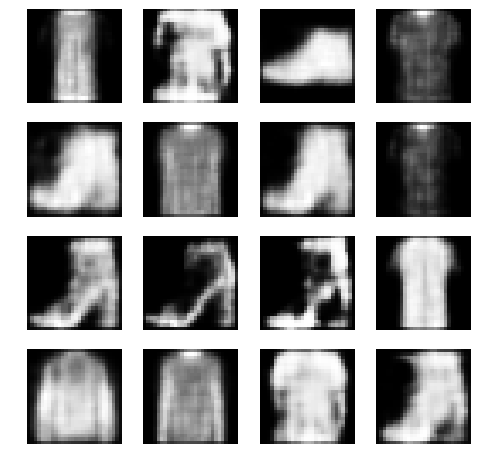

In [ ]:
for epoch in range(1, epochs + 1):
    model.train(train_dataset)
    if epoch % 1 == 0:
        elbo = test_network(model, test_dataset)
        generate_images(model, elbo, epoch, random_vector_for_generation)

In [ ]:
#### test sampling
x_sample = next(iter(test_dataset))
z_sample = model.encode(x_sample)[0].numpy()
plt.scatter(z_sample[:,0], z_sample[:,1], s=10)